### 1. Data

In [ ]:
# hyperparameter
BATCH_SIZE = 32
ROWS = 224
COLS = 224
input_shape = (ROWS, COLS, 3) # 이미지의 높이, 너비가 각각 224 pixel이고, 채널 수가 3인 RGB이미지임.

> 데이터 불러오기

imageDataGenerator를 통해 필요한 만큼의 데이터를 실시간으로 생성하므로 메모리를 효율적으로 사용할 수 있고, data augmentation 기능을 제공해 모델의 일반화 성능을 향상시킨다.

In [ ]:
image_path = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images'

# 이미지 데이터 전처리
train_data = ImageDataGenerator(rescale=1/255.0, # 이미지 픽셀 값 0~1 normalization
                                zoom_range=0.05, # 이미지 확대/ 축소 범위 -> 다양한 시각적 변화 도입
                                horizontal_flip=True, # 수평으로 뒤집기 -> 이미지의 좌우 대칭성 고려
                                validation_split=0.2)


# 훈련 데이터 생성기
train_generator = train_data.flow_from_directory(directory=image_path,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 subset='training',
                                                 shuffle=True,
                                                 seed=42
                                                 )

# 검증 데이터 생성기
valid_generator = train_data.flow_from_directory(directory=image_path,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 subset='validation',
                                                 shuffle=True,
                                                 seed=42
                                                 )

Found 9340 images belonging to 12 classes.
Found 2331 images belonging to 12 classes.


#### data rescaling -> small_images

이미지 3x3로 분할, 각 분할된 이미지를 다른 폴더에 저장한다.

In [ ]:
a = cv2.imread('/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Bicycle/Bicycle (1).png')
a.shape

(120, 120, 3)

In [ ]:
# Bicycle : 1~780
output_dir = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/small_images/Bicycle'

for i in range(1, 781):
  each_image = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Bicycle/Bicycle ('+str(i)+').png'
  image = cv2.imread(each_image)
  height, width, _ = image.shape
  cell_height = height // 3
  cell_width = width // 3

  for r in range(3):
      for c in range(3):
          cell_image = image[r * cell_height: (r + 1) * cell_height,
                               c * cell_width: (c + 1) * cell_width]
          output_path = os.path.join(output_dir, f"Bicycle_{i}_{(r,c)}.jpg")
          cv2.imwrite(output_path, cell_image)

In [ ]:
# Bridge : 21~543
output_dir = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/small_images/Bridge'

for i in range(21, 544):
  each_image = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Bridge/Bridge ('+str(i)+').png'
  image = cv2.imread(each_image)
  height, width, _ = image.shape
  cell_height = height // 3
  cell_width = width // 3

  for r in range(3):
      for c in range(3):
          cell_image = image[r * cell_height: (r + 1) * cell_height,
                               c * cell_width: (c + 1) * cell_width]
          output_path = os.path.join(output_dir, f"Bridge_{i}_{(r,c)}.jpg")
          cv2.imwrite(output_path, cell_image)

In [ ]:
# Bus : 21~1229
output_dir = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/small_images/Bus'

for i in range(21, 1230):
  each_image = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Bus/Bus ('+str(i)+').png'
  image = cv2.imread(each_image)
  height, width, _ = image.shape
  cell_height = height // 3
  cell_width = width // 3

  for r in range(3):
      for c in range(3):
          cell_image = image[r * cell_height: (r + 1) * cell_height,
                               c * cell_width: (c + 1) * cell_width]
          output_path = os.path.join(output_dir, f"Bus_{i}_{(r,c)}.jpg")
          cv2.imwrite(output_path, cell_image)

In [ ]:
# Car : 21~3578 -> 너무 많으므로, 21~1229만 뽑겠다.
output_dir = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/small_images/Car'

for i in range(21, 1230):
  each_image = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Car/Car ('+str(i)+').png'
  image = cv2.imread(each_image)
  height, width, _ = image.shape
  cell_height = height // 3
  cell_width = width // 3

  for r in range(3):
      for c in range(3):
          cell_image = image[r * cell_height: (r + 1) * cell_height,
                               c * cell_width: (c + 1) * cell_width]
          output_path = os.path.join(output_dir, f"Car_{i}_{(r,c)}.jpg")
          cv2.imwrite(output_path, cell_image)

In [ ]:
# Chimney : 1~132 (60빠짐)
output_dir = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/small_images/Other'

#/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Chimney/Chimney (1).png
for i in range(60, 100):
  each_image = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Other/Other ('+str(i)+').png'
  a = cv2.imread(each_image)
  if a is None:
        continue

In [ ]:
# Chimney : 1~59
output_dir = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/small_images/Chimney'

#/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Chimney/Chimney (1).png
for i in range(1,60):
  each_image = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Chimney/Chimney ('+str(i)+').png'
  image = cv2.imread(each_image)
  height, width, _ = image.shape
  cell_height = height // 3
  cell_width = width // 3

  for r in range(3):
      for c in range(3):
          cell_image = image[r * cell_height: (r + 1) * cell_height,
                               c * cell_width: (c + 1) * cell_width]
          output_path = os.path.join(output_dir, f"Chimney_{i}_{(r,c)}.jpg")
          cv2.imwrite(output_path, cell_image)

In [ ]:
# Crosswalk : 1~1240 -> 너무 많으므로, 1-1000
output_dir = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/small_images/Crosswalk'

for i in range(1, 1001):
  each_image = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Crosswalk/Cross ('+str(i)+').png'
  image = cv2.imread(each_image)
  height, width, _ = image.shape
  cell_height = height // 3
  cell_width = width // 3

  for r in range(3):
      for c in range(3):
          cell_image = image[r * cell_height: (r + 1) * cell_height,
                               c * cell_width: (c + 1) * cell_width]
          output_path = os.path.join(output_dir, f"Cross_{i}_{(r,c)}.jpg")
          cv2.imwrite(output_path, cell_image)

In [ ]:
# Hydrant 21~972
output_dir = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/small_images/Hydrant'

for i in range(21, 973):
  each_image = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Hydrant/Hydrant ('+str(i)+').png'
  image = cv2.imread(each_image)
  height, width, _ = image.shape
  cell_height = height // 3
  cell_width = width // 3

  for r in range(3):
      for c in range(3):
          cell_image = image[r * cell_height: (r + 1) * cell_height,
                               c * cell_width: (c + 1) * cell_width]
          output_path = os.path.join(output_dir, f"Hydrant_{i}_{(r,c)}.jpg")
          cv2.imwrite(output_path, cell_image)

In [ ]:
import cv2
# Motorcycle 1~101
output_dir = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/small_images/Motorcycle'

for i in range(1, 102):
  each_image = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Motorcycle/Motorcycle ('+str(i)+').png'
  image = cv2.imread(each_image)
  if image is None:
    continue
  height, width, _ = image.shape
  cell_height = height // 3
  cell_width = width // 3

  for r in range(3):
      for c in range(3):
          cell_image = image[r * cell_height: (r + 1) * cell_height,
                               c * cell_width: (c + 1) * cell_width]
          output_path = os.path.join(output_dir, f"Motorcycle_{i}_{(r,c)}.jpg")
          cv2.imwrite(output_path, cell_image)

In [ ]:
# other은 테스트 데이터로 사용 x (훈련용)
# # Other 21~ 1469
# output_dir = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/small_images/Other'

# for i in range(21,1470):
#   each_image = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Other/Other ('+str(i)+').png'
#   image = cv2.imread(each_image)
#   if image is None:
#     continue
#   height, width, _ = image.shape
#   cell_height = height // 3
#   cell_width = width // 3

#   for r in range(3):
#       for c in range(3):
#           cell_image = image[r * cell_height: (r + 1) * cell_height,
#                                c * cell_width: (c + 1) * cell_width]
#           output_path = os.path.join(output_dir, f"Other_{i}_{(r,c)}.jpg")
#           cv2.imwrite(output_path, cell_image)

In [ ]:
# Palm 1~932
output_dir = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/small_images/Palm'

for i in range(1, 933):
  each_image = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Palm/Palm ('+str(i)+').png'
  image = cv2.imread(each_image)
  if image is None:
    continue
  height, width, _ = image.shape
  cell_height = height // 3
  cell_width = width // 3

  for r in range(3):
      for c in range(3):
          cell_image = image[r * cell_height: (r + 1) * cell_height,
                               c * cell_width: (c + 1) * cell_width]
          output_path = os.path.join(output_dir, f"Palm_{i}_{(r,c)}.jpg")
          cv2.imwrite(output_path, cell_image)

In [ ]:
# Stair 14~1563
output_dir = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/small_images/Stair'

for i in range(14,1563):
  each_image = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Stair/Stair ('+str(i)+').png'
  image = cv2.imread(each_image)
  if image is None:
    continue
  height, width, _ = image.shape
  cell_height = height // 3
  cell_width = width // 3

  for r in range(3):
      for c in range(3):
          cell_image = image[r * cell_height: (r + 1) * cell_height,
                               c * cell_width: (c + 1) * cell_width]
          output_path = os.path.join(output_dir, f"Stair_{i}_{(r,c)}.jpg")
          cv2.imwrite(output_path, cell_image)

In [ ]:
# Traffic Light 1~811
output_dir = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/small_images/Traffic_Light'

for i in range(1, 812):
  each_image = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Traffic Light/Tlight ('+str(i)+').png'
  image = cv2.imread(each_image)
  if image is None:
    continue
  height, width, _ = image.shape
  cell_height = height // 3
  cell_width = width // 3

  for r in range(3):
      for c in range(3):
          cell_image = image[r * cell_height: (r + 1) * cell_height,
                               c * cell_width: (c + 1) * cell_width]
          output_path = os.path.join(output_dir, f"Tlight_{i}_{(r,c)}.jpg")
          cv2.imwrite(output_path, cell_image)

#### data visualization

In [ ]:
# images
def count_images_per_label(folder_path):
    label_counts = {}
    for root, dirs, files in os.walk(folder_path):
        for dir in dirs:
            label_path = os.path.join(root, dir)
            label_count = sum(1 for file in os.listdir(label_path) if file.endswith(('.png', '.jpg', '.jpeg', '.gif')))
            label_counts[dir] = label_count
    return label_counts

folder_path = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images'
label_counts = count_images_per_label(folder_path)
total=0
for label, count in label_counts.items():
    print(f"라벨 '{label}': {count}개의 이미지 파일")
    total+=count
print(f'\n총 {total} 개의 이미지 파일')

라벨 'Bicycle': 780개의 이미지 파일
라벨 'Bridge': 533개의 이미지 파일
라벨 'Bus': 1209개의 이미지 파일
라벨 'Car': 3496개의 이미지 파일
라벨 'Chimney': 124개의 이미지 파일
라벨 'Crosswalk': 1240개의 이미지 파일
라벨 'Hydrant': 955개의 이미지 파일
라벨 'Motorcycle': 81개의 이미지 파일
라벨 'Other': 1340개의 이미지 파일
라벨 'Palm': 911개의 이미지 파일
라벨 'Stair': 211개의 이미지 파일
라벨 'Traffic Light': 791개의 이미지 파일

총 11671 개의 이미지 파일


In [ ]:
# Small images
def count_images_per_label(folder_path):
    label_counts = {}
    for root, dirs, files in os.walk(folder_path):
        for dir in dirs:
            label_path = os.path.join(root, dir)
            label_count = sum(1 for file in os.listdir(label_path) if file.endswith(('.png', '.jpg', '.jpeg', '.gif')))
            label_counts[dir] = label_count
    return label_counts
folder_path = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/small_images'
label_counts = count_images_per_label(folder_path)
total = 0

for label, count in label_counts.items():
    print(f"라벨 '{label}': {count}개의 이미지 파일")
    total+=count
print(f'\n총 {total} 개의 이미지 파일')

라벨 'Palm': 8199개의 이미지 파일
라벨 'Bicycle': 7020개의 이미지 파일
라벨 '.ipynb_checkpoints': 0개의 이미지 파일
라벨 'Bridge': 4707개의 이미지 파일
라벨 'Bus': 10881개의 이미지 파일
라벨 'Car': 10881개의 이미지 파일
라벨 'Chimney': 648개의 이미지 파일
라벨 'Crosswalk': 9000개의 이미지 파일
라벨 'Hydrant': 1639개의 이미지 파일
라벨 'Other': 0개의 이미지 파일
라벨 'Stair': 1890개의 이미지 파일
라벨 'Motorcycle': 729개의 이미지 파일
라벨 'Traffic_Light': 7119개의 이미지 파일

총 62713 개의 이미지 파일


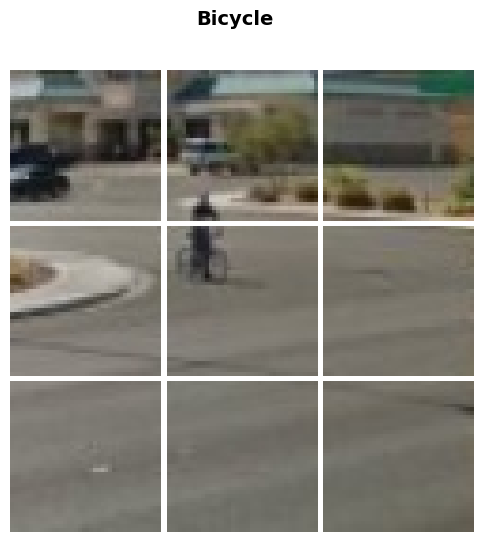

In [ ]:
def visualize_images(images, label):
    fig, axes = plt.subplots(3, 3, figsize=(6, 6))
    axes = axes.ravel()

    for i, image in enumerate(images):
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i].axis('off')

    fig.suptitle(label, fontsize=14, fontweight='bold')
    plt.subplots_adjust(wspace=0.03, hspace=0.03)  # 이미지 간격 조절
    plt.show()

folder_path = '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/small_images'
label = 'Bicycle'  # 이미지의 라벨

label_folder = os.path.join(folder_path, label)
image_files = [file for file in os.listdir(label_folder) if file.endswith(('.png', '.jpg', '.jpeg', '.gif'))]

images = []

for i, image_file in enumerate(image_files):
    if i == 9:
        break
    image_path = os.path.join(label_folder, image_file)
    image = cv2.imread(image_path)
    images.append(image)

visualize_images(images, label)


In [ ]:
# labels
labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
labels

{0: 'Bicycle',
 1: 'Bridge',
 2: 'Bus',
 3: 'Car',
 4: 'Chimney',
 5: 'Crosswalk',
 6: 'Hydrant',
 7: 'Motorcycle',
 8: 'Other',
 9: 'Palm',
 10: 'Stair',
 11: 'Traffic Light'}

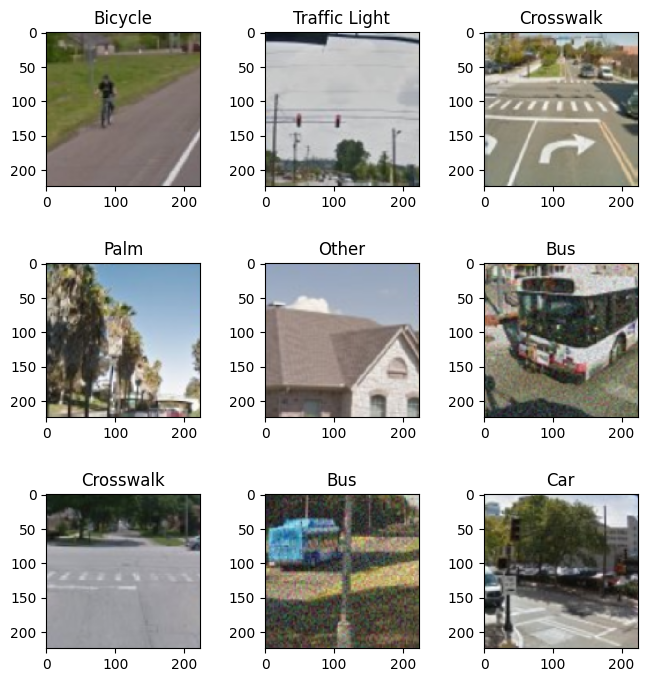

In [ ]:
x,y = train_generator.next() # shuffle을 주었으므로, 호출 시 데이터가 무작위로 생성

plt.figure(figsize=(8,8))
for i in range(0,9):
    image = x[i]
    label = y[i]
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.title(labels[np.argmax(label)])
plt.subplots_adjust(hspace=0.5)
plt.show()